# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95


In [9]:
#SGD
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0811 15:41:12.854843 10504 deprecation_wrapper.py:119] From C:\Users\wayne\.conda\envs\py36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0811 15:41:12.861825 10504 deprecation_wrapper.py:119] From C:\Users\wayne\.conda\envs\py36\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890

W0811 15:41:13.103177 10504 deprecation_wrapper.py:119] From C:\Users\wayne\.conda\envs\py36\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.




Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0811 15:41:13.449254 10504 deprecation.py:323] From C:\Users\wayne\.conda\envs\py36\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 21s 415us/step - loss: 2.3154 - acc: 0.1108 - val_loss: 2.3041 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 9s 173us/step - loss: 2.3043 - acc: 0.0990 - val_loss: 2.3036 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 9s 176us/step - loss: 2.3042 - acc: 0.0987 - val_loss: 2.3040 - val_acc: 0.1001
Epoch 4/50
50000/50000 [==============================] - 8s 163us/step - loss: 2.3040 - acc: 0.0999 - val_loss: 2.3044 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.3040 - acc: 0.0997 - val_loss: 2.3045 - val_acc: 0.1001
Epoch 6/50
50000/50000 [==============================] - 8s 156us/step - loss: 2.2551 - acc: 0.1251 - val_loss: 2.1224 - val_acc: 0.1739
Epoch 7/50
50000/50000 [==============================] - 8s 151us/step - loss: 2.0825 - acc: 0.1784 - val_loss: 2.0684 -

Epoch 2/50
50000/50000 [==============================] - 8s 170us/step - loss: 1.5991 - acc: 0.4315 - val_loss: 1.5944 - val_acc: 0.4231
Epoch 3/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.5117 - acc: 0.4629 - val_loss: 1.5972 - val_acc: 0.4376
Epoch 4/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.4551 - acc: 0.4817 - val_loss: 1.4828 - val_acc: 0.4715
Epoch 5/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.4059 - acc: 0.5015 - val_loss: 1.4677 - val_acc: 0.4771
Epoch 6/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.3663 - acc: 0.5119 - val_loss: 1.4967 - val_acc: 0.4572
Epoch 7/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.3246 - acc: 0.5321 - val_loss: 1.4307 - val_acc: 0.4971
Epoch 8/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.2903 - acc: 0.5424 - val_loss: 1.3712 - val_acc: 0.5097
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 9s 174us/step - loss: 1.7370 - acc: 0.3938 - val_loss: 1.7024 - val_acc: 0.4049
Epoch 4/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.6746 - acc: 0.4158 - val_loss: 1.6594 - val_acc: 0.4156
Epoch 5/50
50000/50000 [==============================] - 9s 170us/step - loss: 1.6260 - acc: 0.4336 - val_loss: 1.6084 - val_acc: 0.4342
Epoch 6/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.5855 - acc: 0.4465 - val_loss: 1.5848 - val_acc: 0.4422
Epoch 7/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.5513 - acc: 0.4582 - val_loss: 1.5860 - val_acc: 0.4360
Epoch 8/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.5213 - acc: 0.4686 - val_loss: 1.5365 - val_acc: 0.4557
Epoch 9/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.4931 - acc: 0.4777 - val_loss: 1.5250 - val_acc: 0.4570
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 7s 143us/step - loss: 1.9853 - acc: 0.2978 - val_loss: 1.9662 - val_acc: 0.3067
Epoch 5/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.9471 - acc: 0.3130 - val_loss: 1.9323 - val_acc: 0.3193
Epoch 6/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.9162 - acc: 0.3266 - val_loss: 1.9055 - val_acc: 0.3289
Epoch 7/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.8915 - acc: 0.3350 - val_loss: 1.8839 - val_acc: 0.3379
Epoch 8/50
50000/50000 [==============================] - 8s 170us/step - loss: 1.8704 - acc: 0.3438 - val_loss: 1.8645 - val_acc: 0.3422
Epoch 9/50
50000/50000 [==============================] - 8s 170us/step - loss: 1.8525 - acc: 0.3504 - val_loss: 1.8486 - val_acc: 0.3477
Epoch 10/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.8363 - acc: 0.3570 - val_loss: 1.8339 - val_acc: 0.3559
Epoch 11/50
50000/50000 [===================

50000/50000 [==============================] - 8s 161us/step - loss: 2.2355 - acc: 0.1885 - val_loss: 2.2289 - val_acc: 0.1938
Epoch 6/50
50000/50000 [==============================] - 8s 167us/step - loss: 2.2234 - acc: 0.1968 - val_loss: 2.2172 - val_acc: 0.2002
Epoch 7/50
50000/50000 [==============================] - 8s 168us/step - loss: 2.2119 - acc: 0.2071 - val_loss: 2.2061 - val_acc: 0.2114
Epoch 8/50
50000/50000 [==============================] - 8s 169us/step - loss: 2.2010 - acc: 0.2147 - val_loss: 2.1953 - val_acc: 0.2186
Epoch 9/50
50000/50000 [==============================] - 8s 168us/step - loss: 2.1903 - acc: 0.2205 - val_loss: 2.1849 - val_acc: 0.2248
Epoch 10/50
50000/50000 [==============================] - 8s 160us/step - loss: 2.1799 - acc: 0.2264 - val_loss: 2.1746 - val_acc: 0.2271
Epoch 11/50
50000/50000 [==============================] - 7s 136us/step - loss: 2.1698 - acc: 0.2313 - val_loss: 2.1647 - val_acc: 0.2313
Epoch 12/50
50000/50000 [==================

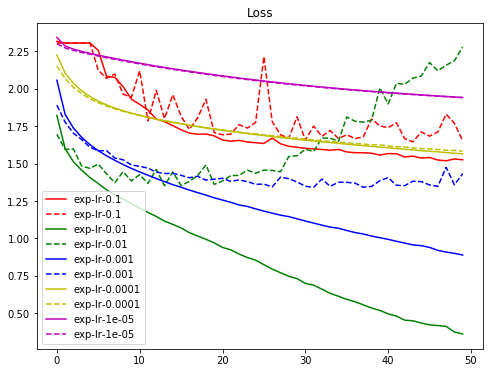

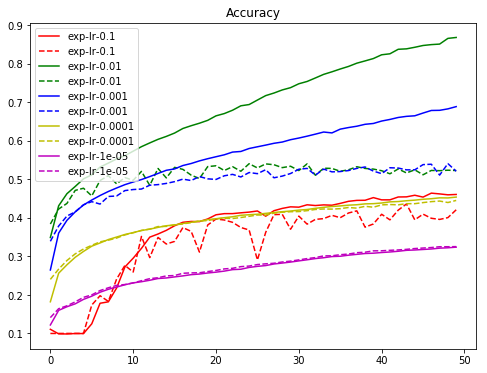

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [12]:
#RMSprop
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.RMSprop(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 197us/step - loss: 14.4482 - acc: 0.0997 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 8s 152us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 7s 147us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 200us/step - loss: 2.2840 - acc: 0.2181 - val_loss: 1.8997 - val_acc: 0.3226
Epoch 2/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.8949 - acc: 0.3160 - val_loss: 1.8801 - val_acc: 0.3234
Epoch 3/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.7853 - acc: 0.3548 - val_loss: 1.8188 - val_acc: 0.3552
Epoch 4/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.7120 - acc: 0.3866 - val_loss: 1.7451 - val_acc: 0.3768
Epoch 5/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.6503 - acc: 0.4092 - val_loss: 1.7070 - val_acc: 0.3916
Epoch 6/50
50000/50000 [==============================] - 7s 147us/step - loss: 1.6120 - acc: 0.4250 - val_loss: 1.6946 - val_acc: 0.3832
Epoch 7/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.5668 - acc: 0.4384 - val_loss: 1.6766 -

50000/50000 [==============================] - 6s 112us/step - loss: 1.7896 - acc: 0.3647 - val_loss: 1.7699 - val_acc: 0.3672
Epoch 3/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.7051 - acc: 0.3940 - val_loss: 1.7220 - val_acc: 0.3765
Epoch 4/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.6482 - acc: 0.4172 - val_loss: 1.6736 - val_acc: 0.4026
Epoch 5/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.6067 - acc: 0.4332 - val_loss: 1.6027 - val_acc: 0.4407
Epoch 6/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.5711 - acc: 0.4439 - val_loss: 1.6171 - val_acc: 0.4228
Epoch 7/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.5403 - acc: 0.4570 - val_loss: 1.5866 - val_acc: 0.4367
Epoch 8/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.5120 - acc: 0.4660 - val_loss: 1.5477 - val_acc: 0.4529
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 5s 100us/step - loss: 1.8754 - acc: 0.3540 - val_loss: 1.8540 - val_acc: 0.3573
Epoch 4/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.8312 - acc: 0.3686 - val_loss: 1.8141 - val_acc: 0.3681
Epoch 5/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.7992 - acc: 0.3793 - val_loss: 1.7855 - val_acc: 0.3783
Epoch 6/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.7719 - acc: 0.3874 - val_loss: 1.7632 - val_acc: 0.3819
Epoch 7/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.7478 - acc: 0.3947 - val_loss: 1.7660 - val_acc: 0.3758
Epoch 8/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.7264 - acc: 0.4027 - val_loss: 1.7191 - val_acc: 0.4029
Epoch 9/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.7079 - acc: 0.4092 - val_loss: 1.7138 - val_acc: 0.4052
Epoch 10/50
50000/50000 [==========================

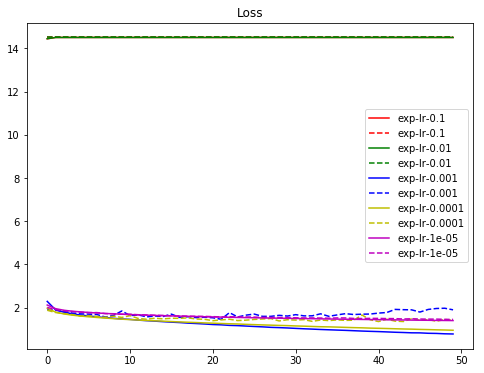

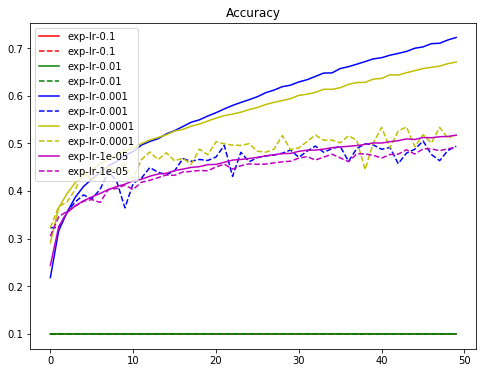

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [14]:
#Adam
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 203us/step - loss: 14.4438 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 8s 162us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 7s 146us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 6s 118us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 6s 118us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 6s 119us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 5s 98us/step - loss: 14.5063 - acc: 0.1000 - val_lo

50000/50000 [==============================] - 8s 162us/step - loss: 1.9396 - acc: 0.2995 - val_loss: 1.7670 - val_acc: 0.3756
Epoch 2/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.7148 - acc: 0.3877 - val_loss: 1.6486 - val_acc: 0.4112
Epoch 3/50
50000/50000 [==============================] - 9s 181us/step - loss: 1.6195 - acc: 0.4219 - val_loss: 1.6020 - val_acc: 0.4301
Epoch 4/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.5500 - acc: 0.4461 - val_loss: 1.5389 - val_acc: 0.4501
Epoch 5/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.5001 - acc: 0.4675 - val_loss: 1.4983 - val_acc: 0.4707
Epoch 6/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.4748 - acc: 0.4753 - val_loss: 1.4978 - val_acc: 0.4608
Epoch 7/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.4333 - acc: 0.4905 - val_loss: 1.5080 - val_acc: 0.4605
Epoch 8/50
50000/50000 [=====================

50000/50000 [==============================] - 5s 100us/step - loss: 1.7138 - acc: 0.3970 - val_loss: 1.6759 - val_acc: 0.4081
Epoch 3/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.6351 - acc: 0.4269 - val_loss: 1.6276 - val_acc: 0.4271
Epoch 4/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.5860 - acc: 0.4424 - val_loss: 1.5695 - val_acc: 0.4483
Epoch 5/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.5403 - acc: 0.4580 - val_loss: 1.5548 - val_acc: 0.4523
Epoch 6/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.5020 - acc: 0.4732 - val_loss: 1.5271 - val_acc: 0.4512
Epoch 7/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.4692 - acc: 0.4830 - val_loss: 1.5240 - val_acc: 0.4599
Epoch 8/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.4474 - acc: 0.4917 - val_loss: 1.4836 - val_acc: 0.4668
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 9s 170us/step - loss: 1.8805 - acc: 0.3480 - val_loss: 1.8541 - val_acc: 0.3504
Epoch 4/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.8265 - acc: 0.3675 - val_loss: 1.8057 - val_acc: 0.3690
Epoch 5/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.7884 - acc: 0.3806 - val_loss: 1.7722 - val_acc: 0.3850
Epoch 6/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.7596 - acc: 0.3891 - val_loss: 1.7475 - val_acc: 0.3889
Epoch 7/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.7355 - acc: 0.3999 - val_loss: 1.7277 - val_acc: 0.3980
Epoch 8/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.7140 - acc: 0.4065 - val_loss: 1.7063 - val_acc: 0.4066
Epoch 9/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.6941 - acc: 0.4124 - val_loss: 1.6869 - val_acc: 0.4154
Epoch 10/50
50000/50000 [====================

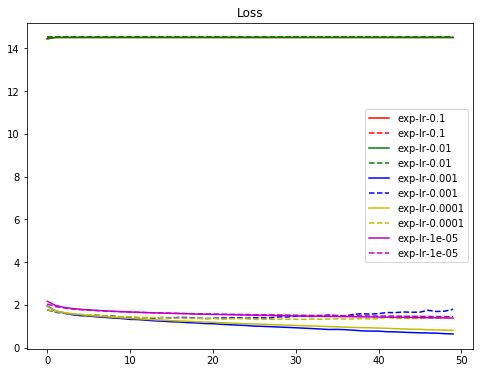

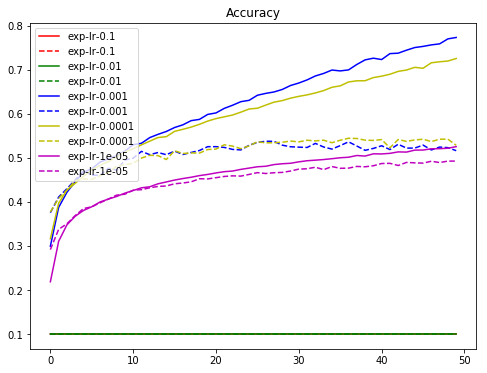

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()